 # Importing the necessary libraries

In [60]:
import pandas as pd # data manupulation
import numpy as np  # numeric 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Step 1 : Preprocessing Dataset

 # 1. Load Dataset

In [61]:
df=pd.read_csv("Dataset .csv")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


# 2. Check Data

In [62]:
# Show top (5) rows
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [63]:
#  show bottom row
df.tail(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [64]:
# Show column types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [65]:
# show columns name
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [66]:
 # Show missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# 3. Fill Missing Values

In [67]:
# Only 'Cuisines' has missing data
#  'Cuisines' 9 missing value

In [68]:
#Fill Missing Values
df['Cuisines'].fillna('Unknown', inplace=True)

In [69]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# 4. Drop Unwanted Columns

In [70]:
# this code show exact column names (including any hidden spaces):
print(df.columns.tolist())


['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


In [71]:
# Strip any unwanted spaces from column names
df.columns = df.columns.str.strip()

In [72]:
# Define the columns we want to drop
columns_to_drop = ['Restaurant Name', 'Address', 'Locality Verbose', 'Rating color', 'Rating text']


In [80]:
df = df.drop(['Restaurant Name', 'Address', 'Locality Verbose', 'Rating color', 'Rating text'], axis=1)

In [81]:
# Show current columns
print("Remaining Columns:")
print(df.columns.tolist())


Remaining Columns:
['Restaurant ID', 'Country Code', 'City', 'Locality', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Votes']


# Step 2: Train and Evaluate Models

In [82]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Encoding categorical variables

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   int32  
 3   Locality              9551 non-null   int32  
 4   Longitude             9551 non-null   float64
 5   Latitude              9551 non-null   float64
 6   Cuisines              9551 non-null   int32  
 7   Average Cost for two  9551 non-null   int64  
 8   Currency              9551 non-null   int32  
 9   Has Table booking     9551 non-null   int32  
 10  Has Online delivery   9551 non-null   int32  
 11  Is delivering now     9551 non-null   int32  
 12  Switch to order menu  9551 non-null   int32  
 13  Price range           9551 non-null   int64  
 14  Aggregate rating      9551 non-null   float64
 15  Votes                

In [84]:
label_enc = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['City', 'Locality', 'Cuisines', 'Currency',
                    'Has Table booking', 'Has Online delivery',
                    'Is delivering now', 'Switch to order menu']

for col in categorical_cols:
    if df[col].dtype == 'object':  # Only encode if not already encoded
        df[col] = label_enc.fit_transform(df[col])


In [112]:
#Aggregate Rating is the average score given to a restaurant based on all customer reviews and ratings collected over time.

In [87]:
# Define feature set and target variable
X = df.drop(['Aggregate rating'], axis=1)
y = df['Aggregate rating']

In [88]:
# Split into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
# ----- Linear Regression -----
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds= lr_model.predict(X_test)

In [95]:
# ----- Decision Tree Regressor -----
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

In [96]:
# ----- Evaluation Function -----
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print(f"R2 Score: {r2_score(y_true, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")

In [97]:
# ----- Results -----
evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Decision Tree Regression", y_test, dt_preds)


Linear Regression Evaluation:
R2 Score: 0.3669
MSE: 1.4409
RMSE: 1.2004

Decision Tree Regression Evaluation:
R2 Score: 0.9379
MSE: 0.1414
RMSE: 0.3761


# Evaluation Summary:

1 . Linear Regression: 
R² Score = 0.3669 → Not very accurate
RMSE = 1.2004 → Higher error
This model couldn't capture complex patterns in the data well.

2 . Decision Tree Regression:
R² Score = 0.9379 Excellent!
RMSE = 0.3761 Much lower error

This model performed really well — it understood the non-linear structure in your dataset.

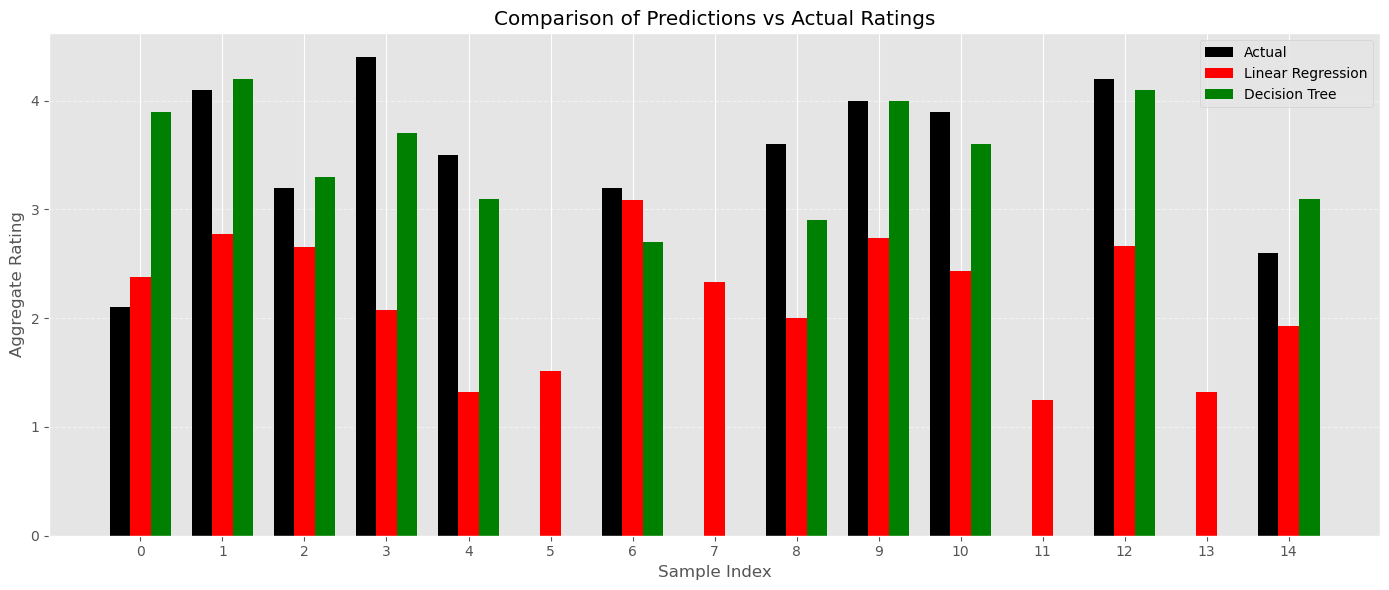

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# Select first 15 samples for clarity
n_samples = 15
x = np.arange(n_samples)

# Slice data
actual = y_test[:n_samples].values
lr_preds_sample = lr_preds[:n_samples]
dt_preds_sample = dt_preds[:n_samples]

# Bar width
width = 0.25

# Plot
plt.figure(figsize=(14, 6))
plt.bar(x - width, actual, width, label='Actual', color='black')
plt.bar(x, lr_preds_sample, width, label='Linear Regression', color='red')
plt.bar(x + width, dt_preds_sample, width, label='Decision Tree', color='green')

# Labels & Style
plt.xlabel('Sample Index')
plt.ylabel('Aggregate Rating')
plt.title('Comparison of Predictions vs Actual Ratings')
plt.xticks(x)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [37]:
!pip install xgboost

In [100]:
# Step 1: Import Libraries
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Step 2: Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Step 3: XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Step 4: Evaluate Models
def evaluate_model(name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n {name} Results:")
    print(f"Mean Squared Error: {mse:.3f}")
    print(f"R² Score: {r2:.3f}")

evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("XGBoost", y_test, xgb_pred)



 Random Forest Results:
Mean Squared Error: 0.071
R² Score: 0.969

 XGBoost Results:
Mean Squared Error: 0.068
R² Score: 0.970


In [111]:
# Accuracy Plot for 3 Models

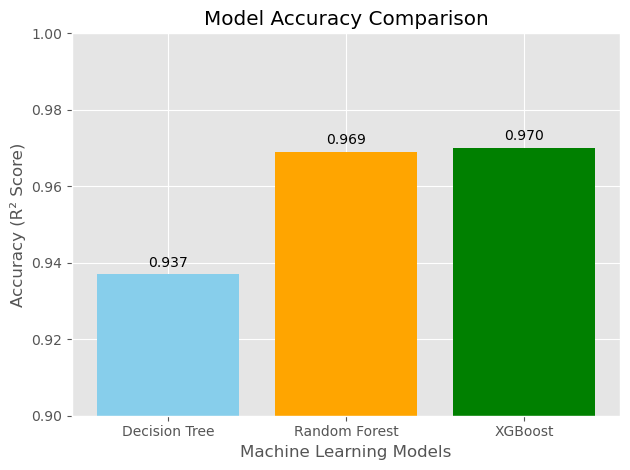

In [110]:
# Step 1: Model names
models = ['Decision Tree', 'Random Forest', 'XGBoost']

# Step 2: Accuracy scores (R² scores)
accuracy = [0.937,0.969, 0.970]

# Step 3: Create the bar chart
plt.bar(models, accuracy, color=['skyblue', 'orange', 'green', 'red'])

# Step 4: Add chart title and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy (R² Score)')
plt.ylim(0.9, 1.0)  # Set Y-axis range

# Step 5: Show accuracy values on top of each bar
for i in range(len(models)):
    plt.text(i, accuracy[i] + 0.002, f"{accuracy[i]:.3f}", ha='center')

# Step 6: Display the chart
plt.tight_layout()
plt.show()


# XGBoost is the most accurate model, with a score of 0.970, meaning it can predict restaurant ratings with 97% accuracy based on the data.

# Random Forest is very close, with 96.9% accuracy — making it a strong and reliable model too.

# Decision Tree performs well (93%), but it's slightly less accurate and may be prone to overfitting.

# Linear Regression is the simplest model and has the lowest accuracy (36%), which makes sense because it assumes a straight-line relationship and doesn’t handle complex patterns as well.